## **Data Collection Section**

In [5]:
import requests
import pandas as pd
import os

# =============================
# 🔹 TMDB API Setup
# =============================
API_KEY = '3327cb0bf56dccad1d96b4930f423557'
BASE_URL = 'https://api.themoviedb.org/3'
DATA_PATH = 'tmdb_data'
PAGES_TO_FETCH = 50  # Fetch more pages for broader coverage

# Ensure directory exists
os.makedirs(DATA_PATH, exist_ok=True)


# =============================
# 🔹 Function to Fetch Data (Multiple Pages)
# =============================
def fetch_data(api_key, endpoint, pages=25):
    all_movies = []
    for page in range(1, pages + 1):
        print(f"🔄 Fetching page {page} of {endpoint}...")
        url = f"{BASE_URL}{endpoint}?api_key={api_key}&language=en-US&page={page}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            all_movies.extend(data.get('results', []))
        else:
            print(f"❌ Failed to fetch page {page}. Status Code: {response.status_code}")
            break

    df = pd.DataFrame(all_movies)
    print(f"✅ Fetched {len(df)} records from {endpoint}.")
    return df


# =============================
# 🔹 Filter Movies by African Indicators
# =============================
def filter_african_movies(df):
    african_keywords = ['Nigeria', 'Ghana', 'South Africa', 'Kenya', 'Egypt', 'Africa']
    df = df.copy()

    # Fill missing fields to prevent errors
    df['overview'] = df['overview'].fillna('')
    df['title'] = df['title'].fillna('')
    
    mask = (
        df['original_language'] == 'en'
    ) & (
        df['overview'].str.contains('|'.join(african_keywords), case=False) |
        df['title'].str.contains('|'.join(african_keywords), case=False)
    )

    return df[mask]


# =============================
# 🔹 Fetch and Save Genre Metadata
# =============================
def fetch_genres(api_key):
    url = f"{BASE_URL}/genre/movie/list?api_key={api_key}&language=en-US"
    response = requests.get(url)
    if response.status_code == 200:
        genres_df = pd.DataFrame(response.json().get('genres', []))
        genres_df.to_csv(f"{DATA_PATH}/genres.csv", index=False)
        print("✅ Genres data saved.")
        return genres_df
    else:
        print("❌ Failed to fetch genres.")
        return pd.DataFrame()


# =============================
# 🔹 Fetch, Filter & Save Movie Categories
# =============================
def fetch_and_save_category(name, endpoint, api_key, pages=25):
    df = fetch_data(api_key, endpoint, pages)
    african_df = filter_african_movies(df)
    file_path = f"{DATA_PATH}/{name}_movies.csv"
    african_df.to_csv(file_path, index=False)
    print(f"✅ {name.capitalize()} African movies saved: {len(african_df)} records.")
    return african_df


# =============================
# 🔹 Execution
# =============================
if __name__ == "__main__":
    print("🔄 Fetching genres...")
    fetch_genres(API_KEY)

    print("\n🔄 Fetching popular African movies...")
    fetch_and_save_category("popular", "/movie/popular", API_KEY, pages=PAGES_TO_FETCH)

    print("\n🔄 Fetching top-rated African movies...")
    fetch_and_save_category("top_rated", "/movie/top_rated", API_KEY, pages=PAGES_TO_FETCH)

    print("\n🔄 Fetching upcoming African movies...")
    fetch_and_save_category("upcoming", "/movie/upcoming", API_KEY, pages=PAGES_TO_FETCH)

    print("\n🔄 Fetching now-playing African movies...")
    fetch_and_save_category("now_playing", "/movie/now_playing", API_KEY, pages=PAGES_TO_FETCH)

    print("\n🎉 All African-focused movie data has been fetched and saved to the 'tmdb_data' folder.")


🔄 Fetching genres...
✅ Genres data saved.

🔄 Fetching popular African movies...
🔄 Fetching page 1 of /movie/popular...
🔄 Fetching page 2 of /movie/popular...
🔄 Fetching page 3 of /movie/popular...
🔄 Fetching page 4 of /movie/popular...
🔄 Fetching page 5 of /movie/popular...
🔄 Fetching page 6 of /movie/popular...
🔄 Fetching page 7 of /movie/popular...
🔄 Fetching page 8 of /movie/popular...
🔄 Fetching page 9 of /movie/popular...
🔄 Fetching page 10 of /movie/popular...
🔄 Fetching page 11 of /movie/popular...
🔄 Fetching page 12 of /movie/popular...
🔄 Fetching page 13 of /movie/popular...
🔄 Fetching page 14 of /movie/popular...
🔄 Fetching page 15 of /movie/popular...
🔄 Fetching page 16 of /movie/popular...
🔄 Fetching page 17 of /movie/popular...
🔄 Fetching page 18 of /movie/popular...
🔄 Fetching page 19 of /movie/popular...
🔄 Fetching page 20 of /movie/popular...
🔄 Fetching page 21 of /movie/popular...
🔄 Fetching page 22 of /movie/popular...
🔄 Fetching page 23 of /movie/popular...
🔄 Fetchin

## **Merging Fetched Data**

In [24]:
import os
import ast

# =============================
# 🔹 File Paths and Config
# =============================
DATA_PATH = 'tmdb_data'
final_data_path = os.path.join(DATA_PATH, 'all_african_movies.csv')

csv_files = [
    "popular_movies.csv",
    "top_rated_movies.csv",
    "upcoming_movies.csv",
    "now_playing_movies.csv"
]

# =============================
# 🔹 Load Genre Mapping
# =============================
print("🔄 Loading genres...")
try:
    genres_df = pd.read_csv(os.path.join(DATA_PATH, 'genres.csv'))
    genre_mapping = pd.Series(genres_df['name'].values, index=genres_df['id']).to_dict()
    print("✅ Genre mapping loaded!\n")
except FileNotFoundError:
    print("❌ Error: 'genres.csv' not found. Make sure genre data is available.")
    genre_mapping = {}


# =============================
# 🔹 Map Genre


🔄 Loading genres...
✅ Genre mapping loaded!



## **Data Exploration and Cleaning**

In [25]:
# =============================
# 🔹 Load Merged African Movies Dataset
# =============================
import pandas as pd

print("🔄 Loading merged African movies dataset...")

DATA_PATH = 'tmdb_data/all_african_movies.csv'

try:
    movies_df = pd.read_csv(DATA_PATH)
    print("\n✅ Dataset Loaded Successfully!")
    print(f"🎬 Total African Movies: {movies_df.shape[0]}")
    print(f"📊 Total Columns: {movies_df.shape[1]}")
    print("\n🔍 Sample Rows:")
    print(movies_df.head(2))
except FileNotFoundError:
    print(f"❌ Error: The file '{DATA_PATH}' was not found. Make sure the merge step was completed.")


🔄 Loading merged African movies dataset...

✅ Dataset Loaded Successfully!
🎬 Total African Movies: 19
📊 Total Columns: 15

🔍 Sample Rows:
   adult                     backdrop_path      genre_ids      id  \
0  False  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg  [28, 12, 878]  284054   
1  False  /bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg  [28, 12, 878]  436270   

  original_language original_title  \
0                en  Black Panther   
1                en     Black Adam   

                                            overview  popularity  \
0  King T'Challa returns home to the reclusive, t...     14.0380   
1  Nearly 5,000 years after he was bestowed with ...     11.3325   

                        poster_path release_date          title  video  \
0  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   2018-02-13  Black Panther  False   
1  /rCtreCr4xiYEWDQTebybolIh6Xe.jpg   2022-10-19     Black Adam  False   

   vote_average  vote_count                         genre_names  
0         7.373       22556  Action, Adventur

In [ ]:
# =============================
# 🔹 Basic Dataset Summary
# =============================
print("\n🔎 Dataset Overview & Missing Values")
print("-" * 40)
print(movies_df.info())

# =============================
# 🔹 Null Values
# =============================
print("\n📉 Null Values Per Column:")
null_summary = movies_df.isnull().sum()
print(null_summary[null_summary > 0] if null_summary.sum() > 0 else "✅ No missing values found.")

# =============================
# 🔹 Duplicates Check
# =============================
duplicates = movies_df.duplicated().sum()
print(f"\n🧩 Duplicate Rows: {duplicates}")

# =============================
# 🔹 Unique Genres
# =============================
print("\n🎭 Unique Genres in Dataset:")
unique_genres = movies_df['genre_names'].dropna().unique()
print(unique_genres if len(unique_genres) > 0 else "❌ No genres found.")

# =============================
# 🔹 Rating Distribution
# =============================
print("\n⭐ Rating Statistics:")
print(movies_df['vote_average'].describe())



🔎 Checking Data Types and Missing Values...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1620 non-null   bool   
 1   backdrop_path      1495 non-null   object 
 2   genre_ids          1620 non-null   object 
 3   id                 1620 non-null   int64  
 4   original_language  1620 non-null   object 
 5   original_title     1620 non-null   object 
 6   overview           1583 non-null   object 
 7   popularity         1620 non-null   float64
 8   poster_path        1568 non-null   object 
 9   release_date       1620 non-null   object 
 10  title              1620 non-null   object 
 11  video              1620 non-null   bool   
 12  vote_average       1620 non-null   float64
 13  vote_count         1620 non-null   int64  
 14  genre_names        1602 non-null   object 
dtypes: bool(2), float64(2), int

In [30]:
movies_df.head(5)

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,genre_names,release_year,title_lower
0,"[10751, 35, 12, 14]",950387,A Minecraft Movie,Four misfits find themselves struggling with o...,943.1246,2025-03-31,A Minecraft Movie,6.530,1234,"Family, Comedy, Adventure, Fantasy",2025,a minecraft movie
1,"[27, 9648]",574475,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",491.2483,2025-05-09,Final Destination Bloodlines,7.304,204,"Horror, Mystery",2025,final destination bloodlines
2,"[10751, 14]",447273,Snow White,"Following the benevolent King's disappearance,...",426.4667,2025-03-12,Snow White,4.347,851,"Family, Fantasy",2025,snow white
3,"[10752, 28]",1241436,Warfare,A platoon of Navy SEALs embarks on a dangerous...,377.8279,2025-04-09,Warfare,7.140,350,"War, Action",2025,warfare
4,"[28, 80, 53]",1197306,A Working Man,Levon Cade left behind a decorated military ca...,382.5636,2025-03-26,A Working Man,6.544,789,"Action, Crime, Thriller",2025,a working man


In [26]:
# =============================
# 🔹 Drop Unnecessary Columns
# =============================
columns_to_drop = ['backdrop_path', 'poster_path', 'video', 'adult', 'original_language']
movies_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(f"✅ Dropped columns: {columns_to_drop}")

# =============================
# 🔹 Handle Missing Values
# =============================
# Fill missing 'overview' and 'genre_names'
movies_df['overview'] = movies_df['overview'].fillna("Not Available")
movies_df['genre_names'] = movies_df['genre_names'].fillna("Unknown")

# Fill missing 'release_date' with a placeholder
movies_df['release_date'] = movies_df['release_date'].fillna('1900-01-01')

# =============================
# 🔹 Convert Data Types
# =============================
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
print("✅ Converted 'release_date' to datetime.")

# =============================
# 🔹 Final Checks
# ===========================


✅ Dropped columns: ['backdrop_path', 'poster_path', 'video', 'adult', 'original_language']
✅ Converted 'release_date' to datetime.


In [ ]:
# =============================
# 🔹 Save the Cleaned Data
# =============================
CLEAN_PATH = 'tmdb_data/cleaned_movies.csv'
movies_df.to_csv(CLEAN_PATH, index=False)
print(f"\n✅ Cleaned dataset successfully saved as '{CLEAN_PATH}'!")



✅ Cleaned dataset saved as 'tmdb_data/cleaned_movies.csv'!


## **Visualization**

🔄 Loading cleaned data...
✅ Data Loaded! Total records: 1620

✅ 'release_year' already exists.



C:\Users\KENTORA\AppData\Local\Temp\ipykernel_3820\677624751.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
C:\Users\KENTORA\AppData\Local\Temp\ipykernel_3820\677624751.py:43: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Arial.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

c:\Users\KENTORA\Documents\Anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


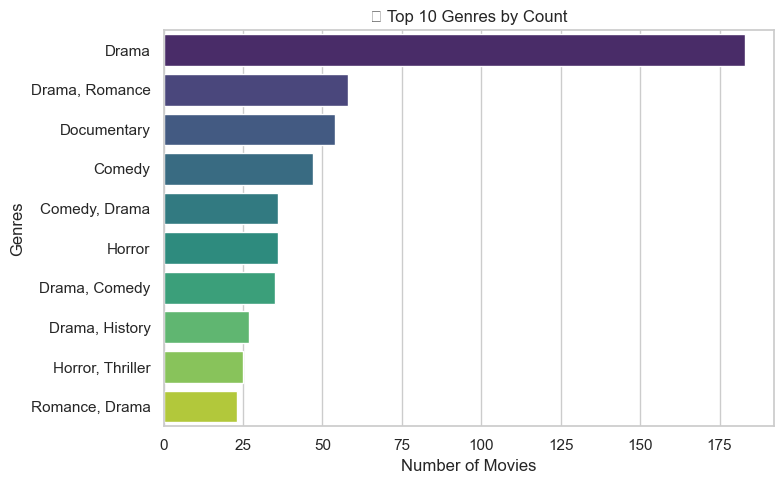

C:\Users\KENTORA\AppData\Local\Temp\ipykernel_3820\677624751.py:54: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\KENTORA\Documents\Anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


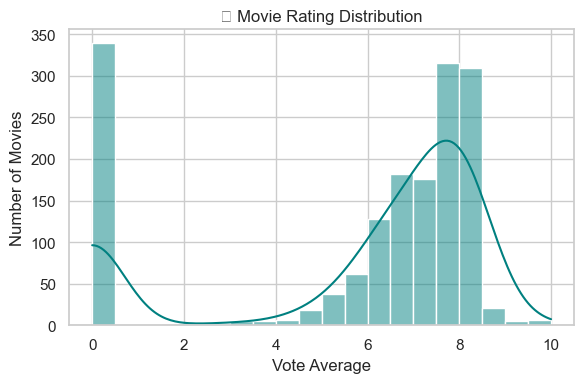

C:\Users\KENTORA\AppData\Local\Temp\ipykernel_3820\677624751.py:65: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\KENTORA\Documents\Anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


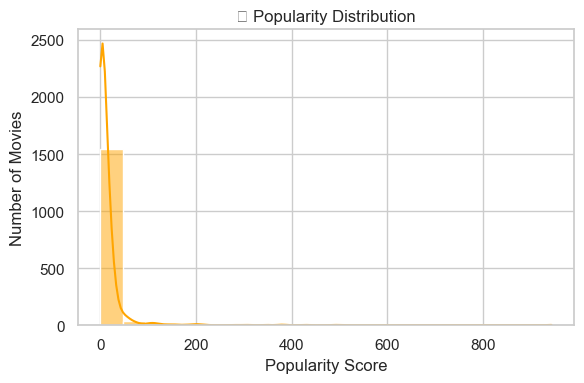

C:\Users\KENTORA\AppData\Local\Temp\ipykernel_3820\677624751.py:76: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\KENTORA\Documents\Anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


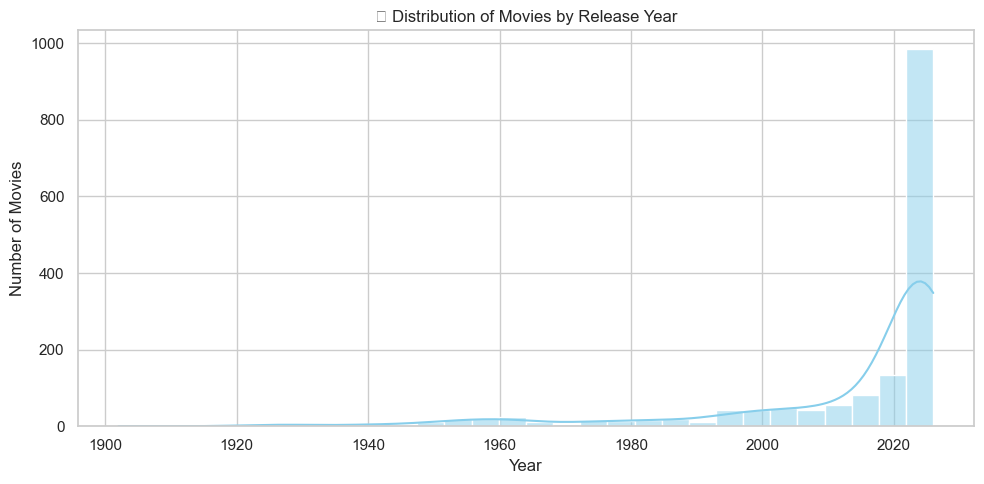

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 🔹 File Paths
# =============================
DATA_PATH = 'tmdb_data/cleaned_movies.csv'

print("🔄 Loading cleaned data...")
movies_df = pd.read_csv(DATA_PATH)
print(f"✅ Data Loaded! Total records: {len(movies_df)}\n")

# =============================
# 🔄 Add release_year from release_date
# =============================
if 'release_year' not in movies_df.columns:
    print("⏳ Extracting 'release_year' from 'release_date'...")
    movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
    movies_df['release_year'] = movies_df['release_date'].dt.year
    # Save the updated DataFrame back to CSV
    movies_df.to_csv(DATA_PATH, index=False)
    print("✅ 'release_year' added and saved successfully!\n")
else:
    print("✅ 'release_year' already exists.\n")

# =============================
# 🔹 Visualization Settings
# =============================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# =============================
# 🎥 Genre Distribution
# =============================
plt.figure(figsize=(8, 5))
# Clean genre names to avoid issues
movies_df['genre_names'] = movies_df['genre_names'].fillna('Unknown')
genre_counts = movies_df['genre_names'].value_counts().head(10)
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title("🎥 Top 10 Genres by Count")
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

# =============================
# ⭐ Vote Average Distribution
# =============================
plt.figure(figsize=(6, 4))
sns.histplot(movies_df['vote_average'], bins=20, kde=True, color='teal')
plt.title("⭐ Movie Rating Distribution")
plt.xlabel("Vote Average")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

# =============================
# 🔥 Popularity Distribution
# =============================
plt.figure(figsize=(6, 4))
sns.histplot(movies_df['popularity'], bins=20, kde=True, color='orange')
plt.title("🔥 Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

# =============================
# 📅 Movie Release Year Distribution
# =============================
plt.figure(figsize=(10, 5))
sns.histplot(movies_df['release_year'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("📅 Distribution of Movies by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


## **Build a function to get recommendations**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import numpy as np

# Load cleaned data
DATA_PATH = 'tmdb_data/cleaned_movies.csv'
movies_df = pd.read_csv(DATA_PATH)

# Fill NaNs if any
movies_df['genre_names'] = movies_df['genre_names'].fillna('')
movies_df['vote_average'] = movies_df['vote_average'].fillna(movies_df['vote_average'].mean())
movies_df['popularity'] = movies_df['popularity'].fillna(movies_df['popularity'].mean())
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce').fillna(movies_df['release_year'].median())

# Create lowercase title column for easier matching
movies_df['title_lower'] = movies_df['title'].str.lower()

# Vectorize genres
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(movies_df['genre_names'])

# Normalize numeric features
scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(movies_df[['vote_average', 'popularity', 'release_year']])

# Combine genre vectors and numeric features
feature_matrix = hstack([genre_matrix, numeric_features])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Function to recommend movies
def recommend_movies(title, cosine_sim=cosine_sim, df=movies_df, top_n=10):
    title_lower = title.lower()
    idx = df.index[df['title_lower'] == title_lower]
    if len(idx) == 0:
        return f"Movie titled '{title}' not found."
    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude the movie itself

    movie_indices = [i[0] for i in sim_scores]

    recommendations = df.iloc[movie_indices][['title', 'genre_names', 'vote_average', 'popularity', 'release_year']].copy()
    recommendations['similarity_score'] = [score for _, score in sim_scores]

    return recommendations.reset_index(drop=True)

# Example Usage:
print(recommend_movies('The Avengers'))


                                          title  \
0                       Guardians of the Galaxy   
1                            Mad Max: Fury Road   
2                  Rogue One: A Star Wars Story   
3                        Avengers: Infinity War   
4  Star Wars: Episode III - Revenge of the Sith   
5                             Avengers: Endgame   
6                              Ready Player One   
7                    Captain America: Civil War   
8                       Avengers: Age of Ultron   
9                       Spider-Man: No Way Home   

                          genre_names  vote_average  popularity  release_year  \
0  Action, Science Fiction, Adventure         7.905      9.8653          2014   
1  Action, Adventure, Science Fiction         7.600     15.7749          2015   
2  Action, Adventure, Science Fiction         7.496     24.2258          2016   
3  Adventure, Action, Science Fiction         8.236     32.8280          2018   
4  Adventure, Action, Science Fic